Профессия Data Science  
Блок 4. Введение в машинное обучение  
**ML-8. Продвинутые методы машинного обучения**

---

## **✍ Оглавление:**

1. Введение

---

## **1. Введение**

**<center> Ансамблирование моделей </center>**

При изучении Data Science идея ансамблирования впервые встречается при упоминании такой модели, как случайный лес. В данной модели обучаются базовые модели, представленные решающими деревьями,  предсказания которых впоследствии агрегируются некоторым образом, зависящим от задачи. В случае задачи регрессии берётся среднее либо средневзвешенное. В случае задачи классификации класс присваивается по принципу большинства.

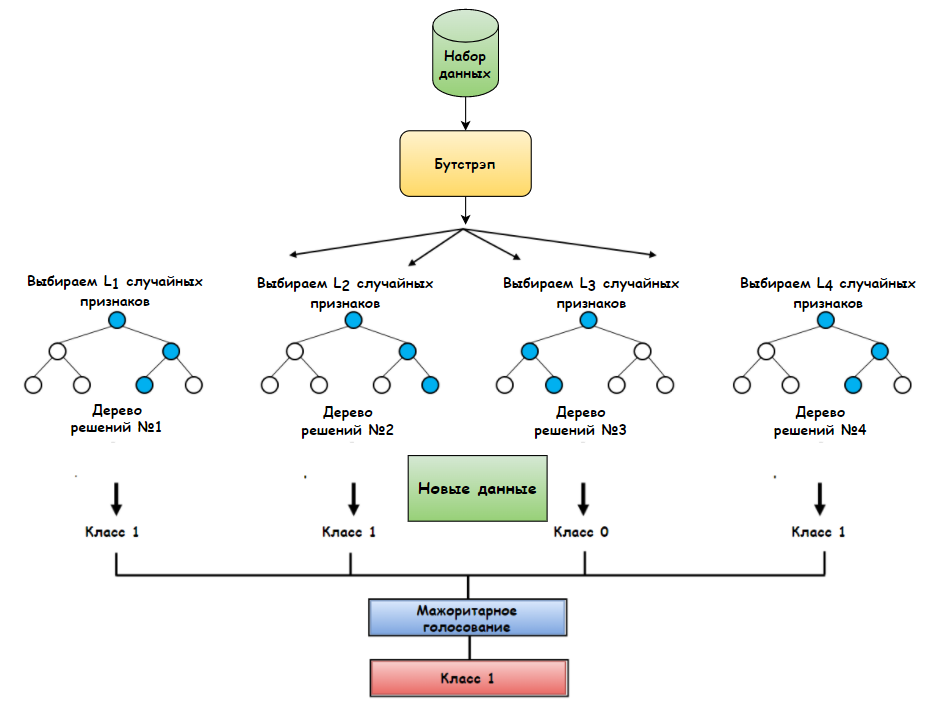

Этот знакомый нам подход построения ансамбля называется бэггингом и позволяет улучшить качество предсказания. Однако существуют и другие техники ансамблирования, которым и посвятим часть модуля.